# Compare optimization

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook use [%s]."%(device))

PyTorch version:[1.7.0].
This notebook use [cpu].


# Set hyper-parameter

In [2]:
EPOCHS = 100
BATCH_SIZE=128
LEARNING_RATE=0.1
print ("Done.")

Done.


# Prepare dataset

Done.


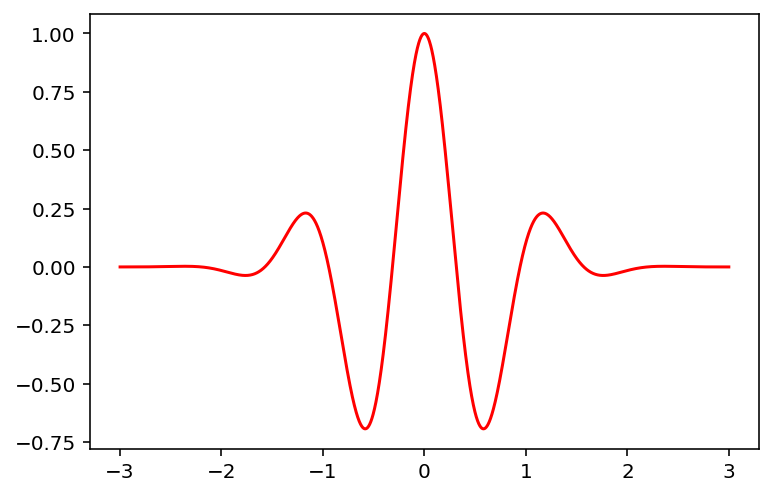

In [3]:
# 1D line
X = -3 + 6*np.random.rand(10000, 1)
sorted_idx = np.argsort(X[:, 0])
Y = np.exp(-(X**2))*np.cos(5*X)
plt.plot(X[sorted_idx, 0], Y[sorted_idx, 0], 'r-')

X = torch.Tensor(X).to(device)
Y = torch.Tensor(Y).to(device)

print ("Done.")

# Define Model

In [4]:
# our model
class Model(nn.Module):
    def __init__(self, input_channel=1, hidden_size=128, output_channel=1, init_weight="he", init_bias="zero"):
        super(Model, self).__init__()

        self.init_weight = init_weight
        self.init_bias = init_bias

        self.linear1 = nn.Linear(input_channel, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_channel)

        self.init_params()

    def init_params(self):
        init_weight_method = {
        "he": nn.init.kaiming_normal_, 
        "xavier": nn.init.xavier_normal_
        }        
        init_bias_method = {
            "zero": nn.init.zeros_, 
            "uniform": nn.init.uniform_
        }
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init_weight_method[self.init_weight](m.weight)
                init_bias_method[self.init_bias](m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = F.relu((self.linear2(X)))
        X = self.linear3(X)
        return X
print ("Done.")    

Done.


# Instantiate three different models

In [5]:
model_sgd = Model(init_weight='xavier').to(device)
sgd = optim.SGD(model_sgd.parameters(), lr=LEARNING_RATE)

model_momentum = Model(init_weight='xavier').to(device)
momentum = optim.SGD(model_momentum.parameters(), lr=LEARNING_RATE, momentum=0.9)

model_adam = Model(init_weight='xavier').to(device)
adam = optim.Adam(model_adam.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()
print ("Done.")

Done.


# Calculate Parameters

In [6]:
def count_total_params(model):
    total_params = 0
    for param_name, param in model.named_parameters():
        if param.requires_grad:
            total_params += len(param.reshape(-1))
    print(f"Number of Total Parameters: {total_params:,d}")    

count_total_params(model_sgd)
count_total_params(model_momentum)
count_total_params(model_adam)

Number of Total Parameters: 16,897
Number of Total Parameters: 16,897
Number of Total Parameters: 16,897


# Train Each Model 

Start training !
epoch:[1/100] sgd cost:[0.114] momentum cost:[0.098] adam cost:[11.262]


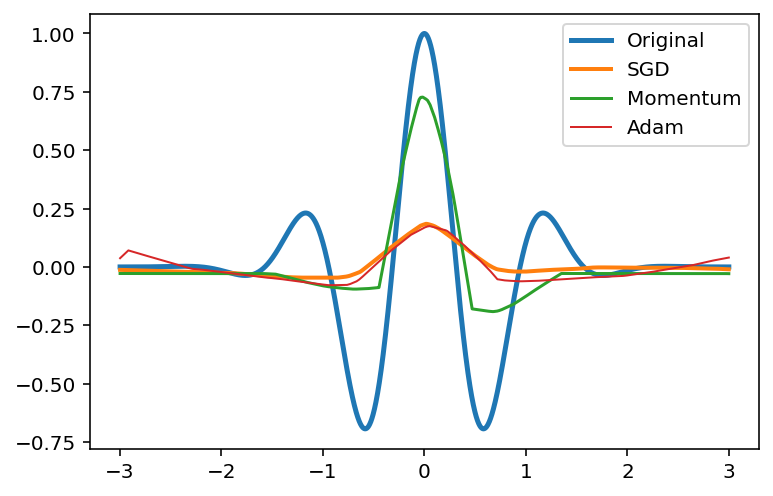

epoch:[5/100] sgd cost:[0.039] momentum cost:[0.002] adam cost:[0.002]
epoch:[9/100] sgd cost:[0.009] momentum cost:[0.001] adam cost:[0.001]
epoch:[13/100] sgd cost:[0.003] momentum cost:[0.000] adam cost:[0.004]
epoch:[17/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[21/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]


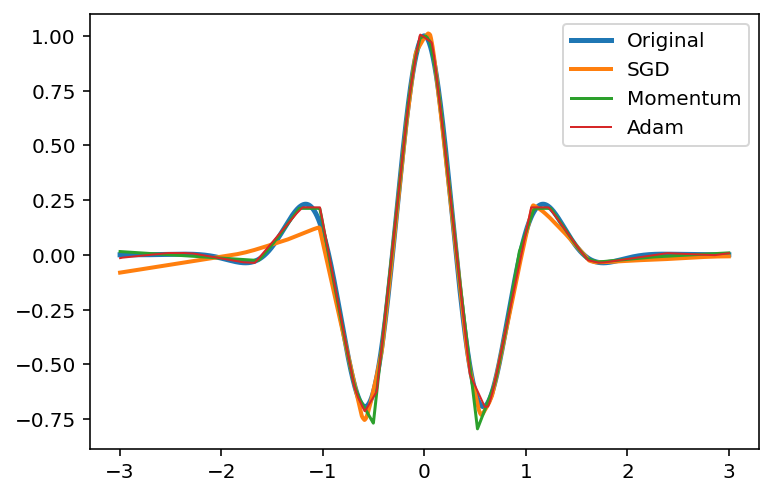

epoch:[25/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[29/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[33/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[37/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[41/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]


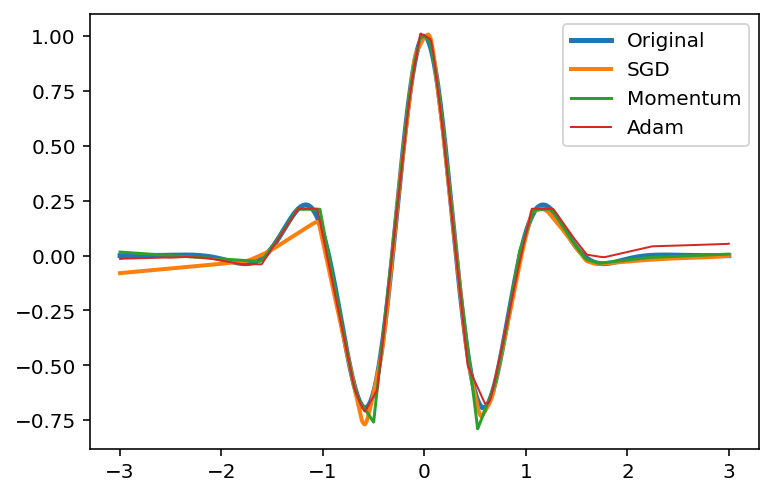

epoch:[45/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[49/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[53/100] sgd cost:[0.001] momentum cost:[0.000] adam cost:[0.000]
epoch:[57/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.001]
epoch:[61/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.000]


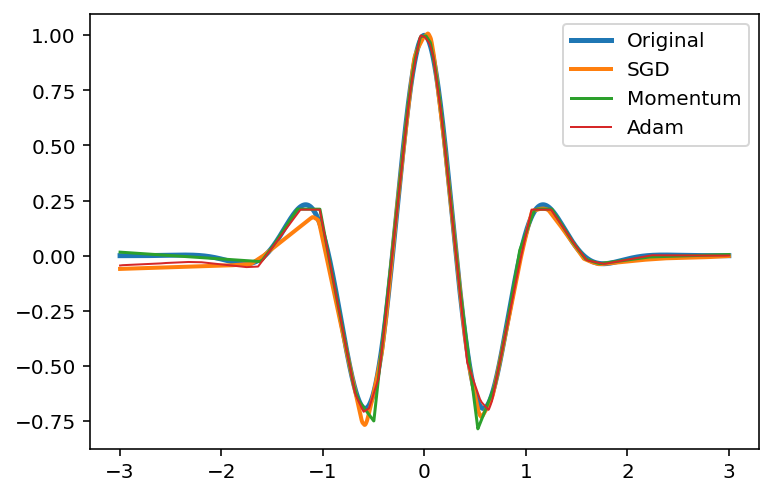

epoch:[65/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.000]
epoch:[69/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.000]
epoch:[73/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.000]
epoch:[77/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.000]
epoch:[81/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.040]


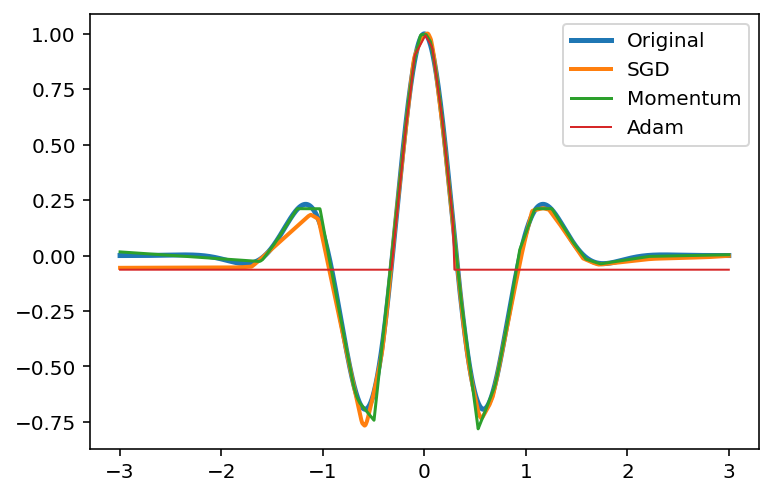

epoch:[85/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.040]
epoch:[89/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.040]
epoch:[93/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.040]
epoch:[97/100] sgd cost:[0.000] momentum cost:[0.000] adam cost:[0.040]


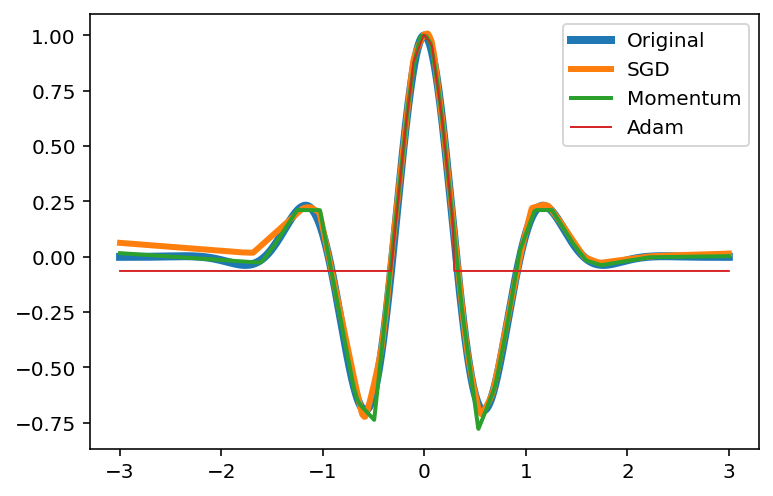

Done.


In [7]:
# Training Phase
plot_every,print_every = 20, 4
num_steps = len(X)//BATCH_SIZE + 1

print("Start training !")

# Training loop
for epoch in range(EPOCHS):
    
    epoch_loss_sgd = 0
    epoch_loss_momentum = 0
    epoch_loss_adam = 0

    for idx in range(num_steps):
        batxh_x = X[idx:idx+BATCH_SIZE]
        batxh_y = Y[idx:idx+BATCH_SIZE]
        # SGD model
        y_pred_sgd = model_sgd(batxh_x)
        loss_sgd = criterion(y_pred_sgd, batxh_y)
        epoch_loss_sgd += loss_sgd

        sgd.zero_grad()
        loss_sgd.backward()
        sgd.step()

        # Momentum model
        y_pred_momentum = model_momentum(batxh_x)
        loss_momentum = criterion(y_pred_momentum, batxh_y)
        epoch_loss_momentum += loss_momentum

        momentum.zero_grad()
        loss_momentum.backward()
        momentum.step()
            
        # Adam model
        y_pred_adam = model_adam(batxh_x)
        loss_adam = criterion(y_pred_adam, batxh_y)
        epoch_loss_adam += loss_adam

        adam.zero_grad()
        loss_adam.backward()
        adam.step()

    if epoch % print_every == 0:
        print(f"epoch:[{epoch+1}/{EPOCHS}] sgd cost:[{epoch_loss_sgd/num_steps:.3f}] momentum cost:[{epoch_loss_momentum/num_steps:.3f}] adam cost:[{epoch_loss_adam/num_steps:.3f}]")
    
    if epoch % plot_every == 0 :
        with torch.no_grad():
            Y_sgd = model_sgd(X)
            Y_momentum = model_momentum(X)
            Y_adam = model_adam(X)

        plt.plot(X[sorted_idx].cpu().detach().numpy(), Y[sorted_idx].cpu().detach().numpy(), linewidth=2.5)
        plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_sgd[sorted_idx].cpu().detach().numpy(), linewidth=2)
        plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_momentum[sorted_idx].cpu().detach().numpy(), linewidth=1.5)
        plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_adam[sorted_idx].cpu().detach().numpy(), linewidth=1)
        plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
        plt.show()

with torch.no_grad():
    Y_sgd = model_sgd(X)
    Y_momentum = model_momentum(X)
    Y_adam = model_adam(X)
    
plt.plot(X[sorted_idx].cpu().detach().numpy(), Y[sorted_idx].cpu().detach().numpy(), linewidth=4)
plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_sgd[sorted_idx].cpu().detach().numpy(), linewidth=3)
plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_momentum[sorted_idx].cpu().detach().numpy(), linewidth=2)
plt.plot(X[sorted_idx].cpu().detach().numpy(), Y_adam[sorted_idx].cpu().detach().numpy(), linewidth=1)
plt.legend(["Original", "SGD", "Momentum", "Adam"], loc="upper right")
plt.show()
print("Done.")